In [77]:
import pandas as pd
import numpy as np
import itertools
import sklearn.cluster as skc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import plotly.plotly as py
import plotly.tools as tls
py.sign_in('AbhishekMalali', 'rwqa8v03mr')
from plotly.graph_objs import *
%matplotlib inline

#### Loading the data for the 2012-13 Season

In [78]:
features12 = pd.read_pickle('../Data/features12-13.pkl')
tr_features12 = features12.transpose()

In [79]:
#Splitting the smoothed_value_list into 38 new columns
split_fn = lambda x: pd.Series([i for i in x])
tr_features12_sm = tr_features12['smoothed_value_list'].apply(split_fn)

In [80]:
#Splitting the cum_value_list into 38 new columns
tr_features12_cm = tr_features12['cum_value_list'].apply(split_fn)

In [81]:
#Generating column names for the new dataframe
col_names_sm = []
col_names_cm = []
for i in range(38):
    col_names_sm.append('smooth_value_week_'+str(i+1))
    col_names_cm.append('cuml_value_week_'+str(i+1))

In [82]:
#Setting the column names for the new dataframe
tr_features12_sm.columns = col_names_sm
tr_features12_cm.columns = col_names_cm

In [83]:
#Concatenating the two dataframes
df_features12 = pd.concat([tr_features12,tr_features12_sm,tr_features12_cm],axis=1)

In [84]:
#Selecting columns to be clustered
columns_cluster = [[u'avg_value'], [u'avg_value_smoothed'],
        [u'nassists'], [u'naway_assists'], [u'naway_goals'],
        [u'nearly_assists'], [u'nearly_goals'], [u'nequalizer_assists'],
        [u'nequalizer_goals'], [u'ngoals'], [u'nhome_assists'], [u'nhome_goals'],
        [u'nlate_assists'], [u'nlate_goals'], [u'nmid_assists'], [u'nmid_goals'],
        [u'nsub_assists'], [u'nsub_goals'], [u'ntiebreaker_assists'],
        [u'ntiebreaker_goals'], [u'season_value'],col_names_sm, col_names_cm]
columns_cluster = list(itertools.chain(*columns_cluster))

In [85]:
#Creating a new dataframe to be used for clustering
df_clustering = df_features12[columns_cluster]

In [86]:
df_clustering.head()

,avg_value,avg_value_smoothed,nassists,naway_assists,naway_goals,nearly_assists,nearly_goals,nequalizer_assists,nequalizer_goals,ngoals,...,cuml_value_week_29,cuml_value_week_30,cuml_value_week_31,cuml_value_week_32,cuml_value_week_33,cuml_value_week_34,cuml_value_week_35,cuml_value_week_36,cuml_value_week_37,cuml_value_week_38
Aaron Hunt,1.142434,1.19568,4,0,5,0,3,0,2,11,...,40.4125,40.4125,40.4125,43.4125,43.4125,43.4125,43.4125,43.4125,43.4125,43.4125
Aaron Lennon,0.6901316,0.5942928,7,2,1,1,1,1,0,4,...,21.4750,21.4750,21.4750,21.4750,21.4750,21.4750,21.4750,21.4750,21.4750,26.2250
Aaron Ramsey,0.1848684,0.1690789,2,2,0,1,0,0,0,1,...,3.1625,6.0250,6.0250,6.0250,6.0250,6.0250,6.0250,6.0250,7.0250,7.0250
Abdelaziz Barrada,0.7023026,0.7875164,6,1,2,1,0,1,2,4,...,23.6875,23.6875,23.6875,23.6875,23.6875,26.6875,26.6875,26.6875,26.6875,26.6875
Abdou TraorÃ©,0.01973684,0.003947368,1,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7500


For the data at hand, we choose 10 clusters to group players in. The features which we use are not only the features like goals, assists and our metric but also the score achieved in every round of games. For clustering we use the K-Means algorithm.

#### Clustering the data using K-Means

In [103]:
n_clusters = 10
km = skc.KMeans(n_clusters=n_clusters)
km.fit(df_clustering.values)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### Counting the number of players in every cluster

In [104]:
for cl_idx in range(10):
    print "Number of players in Cluster no. "+str(cl_idx)+":",\
                    sum(km.labels_ == cl_idx)

Number of players in Cluster no. 0: 413
Number of players in Cluster no. 1: 85
Number of players in Cluster no. 2: 56
Number of players in Cluster no. 3: 122
Number of players in Cluster no. 4: 153
Number of players in Cluster no. 5: 2
Number of players in Cluster no. 6: 137
Number of players in Cluster no. 7: 9
Number of players in Cluster no. 8: 649
Number of players in Cluster no. 9: 37


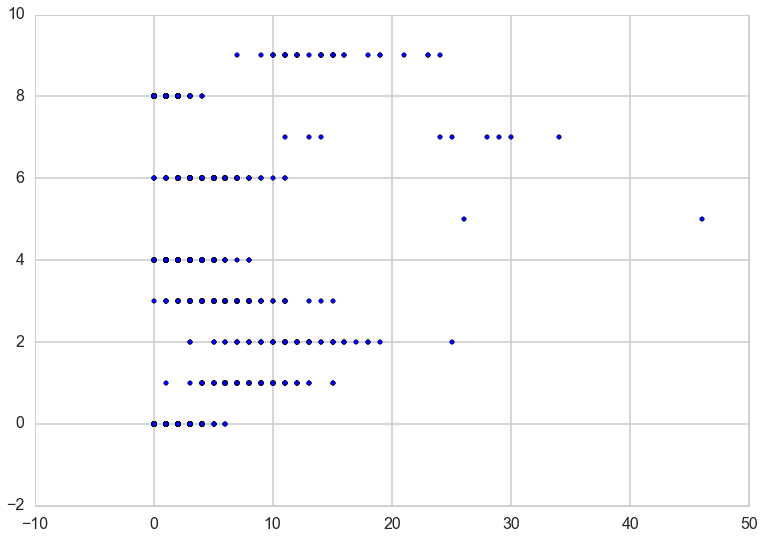

In [105]:
plt.scatter(df_clustering['ngoals'],km.labels_)

#### Visualizing results

In [106]:
results = pd.DataFrame([df_clustering.index,km.labels_,df_clustering.season_value,\
                       df_clustering.ngoals,df_clustering.nassists,\
                       df_clustering.ntiebreaker_goals, df_clustering.ntiebreaker_assists]).T
results.columns = ['Player','Cluster','Value','Goals','Assists','TGoals', 'TAssists']

In [107]:
results[results['Player'] == 'Gareth Bale']

,Player,Cluster,Value,Goals,Assists,TGoals,TAssists
544,Gareth Bale,9,64.05,21,4,10,2


In [108]:
results[results['Cluster'] == 5]

,Player,Cluster,Value,Goals,Assists,TGoals,TAssists
909,Lionel Messi,5,128.2087,46,12,14,5
1334,Robin van Persie,5,98.125,26,9,11,6


In [109]:
# Save results to be used in further analysis
results.to_pickle('../Data/clusteredDF12-13.pkl')

In [110]:
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

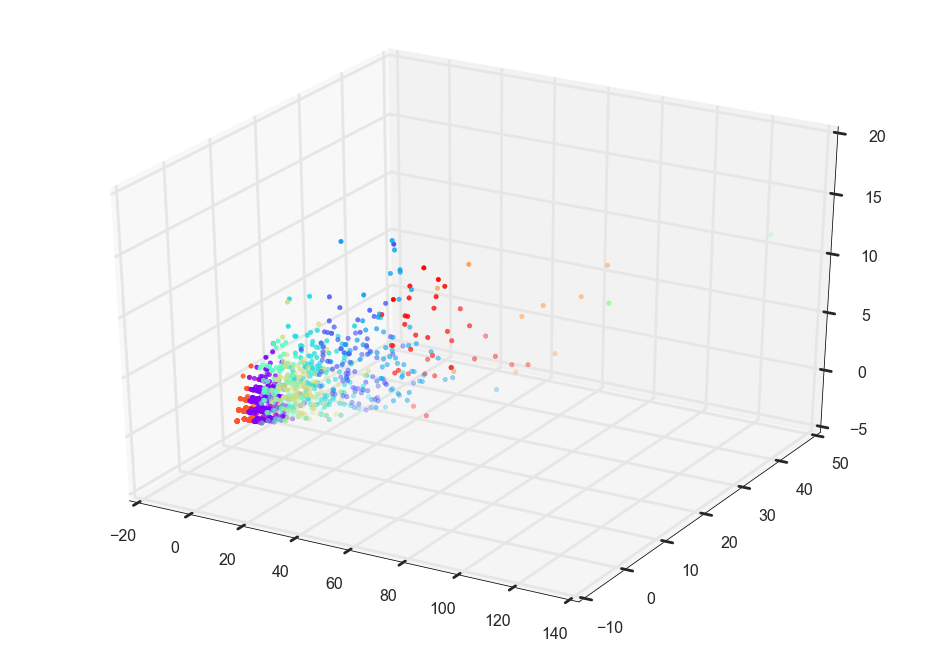

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
cluster_idx = 0
for c in colors:
    ax.scatter(results['Value'][results['Cluster'] == cluster_idx],\
                results['Goals'][results['Cluster'] == cluster_idx],
            zs=results['Assists'][results['Cluster'] == cluster_idx],\
                color=c)
    cluster_idx += 1

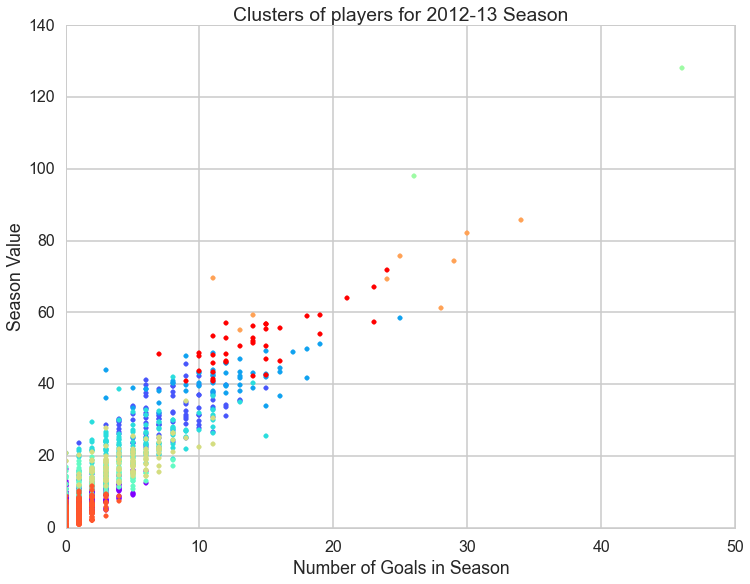

In [112]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

plt.figure(figsize=(12,9))
cluster_idx = 0
for c in colors:
    plt.scatter(results['Goals'][results['Cluster'] == cluster_idx],\
                results['Value'][results['Cluster'] == cluster_idx],\
                color=c)
    cluster_idx += 1
plt.xlim([0,50])
plt.ylim([0,140])
plt.xlabel('Number of Goals in Season')
plt.ylabel('Season Value')
plt.title('Clusters of players for 2012-13 Season')
plt.savefig('../Plots/clusters-12-13.jpg',bbox_inches='tight')

#### Making 2D plotly plot for 2012-13 season

In [113]:
cluster_idx=0
trace_list = []
for c in range(n_clusters):
    trace = Scatter(
        x=np.array(results['Goals'][results['Cluster'] == c].astype(float)),
        y=np.array(results['Value'][results['Cluster'] == c].astype(float)),
        name = "Cluster" + str(c),
        text= results['Player'][results['Cluster'] == c].astype(unicode),
        mode='markers')
    trace_list.append(trace)
data = Data(trace_list)

In [114]:
layout = Layout(
    title='Cluster distribution of players in 2012-13',
    xaxis=dict(
        title='Number of goals in the season',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Season Value',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

In [101]:
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-scatter-12-13')

In [102]:
# Dictionary of style options for all axes
axis = dict(
    showbackground=True, # (!) show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
)

# Make a layout object
layout = Layout(
    title='Cluster Distribution', # set plot title
    scene=Scene(  # (!) axes are part of a 'scene' in 3d plots
        xaxis=XAxis(axis,title='Assists'), # set x-axis style
        yaxis=YAxis(axis,title='Goals'), # set y-axis style
        zaxis=ZAxis(axis,title='Season Value')  # set z-axis style
    )
)

In [40]:
cluster_idx=0
trace_list = []
for c in range(n_clusters):
    trace = Scatter3d(
        z=np.array(results['Value'][results['Cluster'] == c].astype(float)),
        x=np.array(results['Assists'][results['Cluster'] == c].astype(float)),
        y=np.array(results['Goals'][results['Cluster'] == c].astype(float)),
        name = "Cluster" + str(c),
        text= results['Player'][results['Cluster'] == c].astype(unicode),
        mode='markers')
    trace_list.append(trace)
data = Data(trace_list)

In [41]:
# Make a figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
py.iplot(fig, filename='s8_surface')

#### Analyzing data for 2013-14 Season

In [63]:
features13 = pd.read_pickle('../Data/features13-14.pkl')
tr_features13 = features13.transpose()
#Splitting the smoothed_value_list into 38 new columns
split_fn = lambda x: pd.Series([i for i in x])
tr_features13_sm = tr_features13['smoothed_value_list'].apply(split_fn)
#Splitting the cum_value_list into 38 new columns
tr_features13_cm = tr_features13['cum_value_list'].apply(split_fn)

In [64]:
#Generating column names for the new dataframe
col_names_sm = []
col_names_cm = []
for i in range(38):
    col_names_sm.append('smooth_value_week_'+str(i+1))
    col_names_cm.append('cuml_value_week_'+str(i+1))
#Setting the column names for the new dataframe
tr_features13_sm.columns = col_names_sm
tr_features13_cm.columns = col_names_cm

In [65]:
#Concatenating the two dataframes
df_features13 = pd.concat([tr_features13,tr_features13_sm,tr_features13_cm],axis=1)

In [66]:
#Selecting columns to be clustered
columns_cluster = [[u'avg_value'], [u'avg_value_smoothed'],
        [u'nassists'], [u'naway_assists'], [u'naway_goals'],
        [u'nearly_assists'], [u'nearly_goals'], [u'nequalizer_assists'],
        [u'nequalizer_goals'], [u'ngoals'], [u'nhome_assists'], [u'nhome_goals'],
        [u'nlate_assists'], [u'nlate_goals'], [u'nmid_assists'], [u'nmid_goals'],
        [u'nsub_assists'], [u'nsub_goals'], [u'ntiebreaker_assists'],
        [u'ntiebreaker_goals'], [u'season_value'],col_names_sm, col_names_cm]
columns_cluster = list(itertools.chain(*columns_cluster))
#Creating a new dataframe to be used for clustering
df_clustering = df_features13[columns_cluster]
df_clustering = df_clustering.dropna(axis=0)

In [67]:
df_clustering.head(5)

,avg_value,avg_value_smoothed,nassists,naway_assists,naway_goals,nearly_assists,nearly_goals,nequalizer_assists,nequalizer_goals,ngoals,...,cuml_value_week_29,cuml_value_week_30,cuml_value_week_31,cuml_value_week_32,cuml_value_week_33,cuml_value_week_34,cuml_value_week_35,cuml_value_week_36,cuml_value_week_37,cuml_value_week_38
Aaron Hughes,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
Aaron Hunt,0.8835526,0.8835526,7,4,3,2,0,1,3,7,...,20.2125,20.2125,22.9625,26.4125,30.4125,33.575,33.5750,33.5750,33.5750,33.5750
Aaron Lennon,0.1638158,0.1493421,4,2,0,0,0,0,0,1,...,2.6125,2.6125,2.6125,2.6125,2.6125,3.475,6.2250,6.2250,6.2250,6.2250
Aaron Ramsey,0.9121711,0.8631195,7,5,7,1,1,0,0,10,...,26.9000,26.9000,26.9000,26.9000,26.9000,26.900,31.2125,31.2125,31.2125,34.6625
AarÃ³n,0.1059211,0.1059211,1,1,1,0,0,1,0,1,...,4.0250,4.0250,4.0250,4.0250,4.0250,4.025,4.0250,4.0250,4.0250,4.0250


#### Clustering using K-Means

In [68]:
n_clusters = 10
km = skc.KMeans(n_clusters=n_clusters)
km.fit(df_clustering.values)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### Counting the number of players in every cluster

In [69]:
for cl_idx in range(10):
    print "Number of players in Cluster no. "+str(cl_idx)+":",\
                    sum(km.labels_ == cl_idx)

Number of players in Cluster no. 0: 163
Number of players in Cluster no. 1: 48
Number of players in Cluster no. 2: 72
Number of players in Cluster no. 3: 440
Number of players in Cluster no. 4: 406
Number of players in Cluster no. 5: 20
Number of players in Cluster no. 6: 113
Number of players in Cluster no. 7: 50
Number of players in Cluster no. 8: 265
Number of players in Cluster no. 9: 65


In [70]:
results = pd.DataFrame([df_clustering.index,km.labels_,df_clustering.season_value,\
                       df_clustering.ngoals,df_clustering.nassists,\
                       df_clustering.ntiebreaker_goals, df_clustering.ntiebreaker_assists]).T
results.columns = ['Player','Cluster','Value','Goals','Assists','TGoals', 'TAssists']

In [71]:
results[results['Player'] == 'Gareth Bale']

,Player,Cluster,Value,Goals,Assists,TGoals,TAssists
525,Gareth Bale,1,46.2475,15,12,4,3


In [72]:
results[results['Cluster'] == 4]

,Player,Cluster,Value,Goals,Assists,TGoals,TAssists
0,Aaron Hughes,4,0,0,0,0,0
5,Abdelhamid El-Kaoutari,4,1,1,0,0,0
6,Abdou TraorÃ©,4,3,1,0,1,0
11,Abel Aguilar,4,2.75,1,0,0,0
13,Abraham,4,0.8625,0,1,0,0
20,Adem Ljajić,4,1,1,0,0,0
31,Agim Ibraimi,4,4.9125,2,1,0,0
34,Aiden McGeady,4,5.1625,0,1,0,1
36,Alaixys Romao,4,1,1,0,0,0
39,Alberto Frison,4,1,1,0,0,0


In [73]:
# Save results for future use
results.to_pickle('../Data/clusteredDF13-14.pkl')

#### Creating 2D plotly plot for 2013-14 season

In [74]:
cluster_idx=0
trace_list = []
for c in range(n_clusters):
    trace = Scatter(
        x=np.array(results['Goals'][results['Cluster'] == c].astype(float)),
        y=np.array(results['Value'][results['Cluster'] == c].astype(float)),
        name = "Cluster" + str(c),
        text= results['Player'][results['Cluster'] == c].astype(unicode),
        mode='markers')
    trace_list.append(trace)
data = Data(trace_list)

In [75]:
layout = Layout(
    title='Cluster distribution of players in 2013-14',
    xaxis=dict(
        title='Number of goals in the season',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Season Value',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

In [76]:
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-scatter-13-14')